In [1]:
import pandas as pd
import numpy as np

In [2]:
# value_counts
pd.options.display.float_format = '{:.2f}'.format # 소수점 두자리 까지만 출력
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/soccer_match.csv'
df = pd.read_csv(url, parse_dates=['date'])
df

,date,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
0,1993-08-08,Bolivia,South America,Home,Uruguay,South America,3,1,Others,Win
1,1993-08-08,Uruguay,South America,Away,Bolivia,South America,1,3,Others,Lose
2,1993-08-08,Mexico,North America,Home,Brazil,South America,1,1,Frendly,Draw
3,1993-08-08,Brazil,South America,Away,Mexico,North America,1,1,Frendly,Draw
4,1993-08-08,Ecuador,South America,Home,Venezuela,South America,5,0,Others,Win
...,...,...,...,...,...,...,...,...,...,...
47837,2022-06-14,Chile,South America,Away,Ghana,Africa,0,0,Others,Draw
47838,2022-06-14,Tunisia,Africa,Home,Japan,Asia,3,0,Others,Win
47839,2022-06-14,Japan,Asia,Away,Tunisia,Africa,0,3,Others,Lose
47840,2022-06-14,Korea,Asia,Home,Egypt,Africa,4,1,Frendly,Win


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47842 entries, 0 to 47841
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         47842 non-null  datetime64[ns]
 1   nation       47842 non-null  object        
 2   continent    47842 non-null  object        
 3   H/A          47842 non-null  object        
 4   oppenent     47842 non-null  object        
 5   o_continent  47842 non-null  object        
 6   score        47842 non-null  int64         
 7   o_score      47842 non-null  int64         
 8   tournament   47842 non-null  object        
 9   result       47842 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 3.7+ MB


In [4]:
# 경기수가 많은 나라 top5
df['nation'].value_counts()[:5]

nation
Mexico          517
Saudi Arabia    471
USA             464
Korea           436
Brazil          433
Name: count, dtype: int64

<Axes: xlabel='nation'>

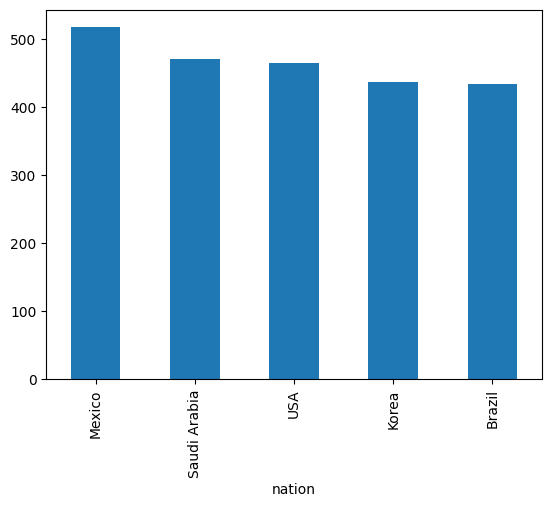

In [5]:
df['nation'].value_counts()[:5].plot(kind='bar')

In [6]:
# 승리 많은 나라 top5
cond1 = df['result'] == 'Win'
df.loc[cond1, 'nation'].value_counts()[:5]

nation
Brazil     292
Mexico     266
Spain      241
USA        239
Germany    237
Name: count, dtype: int64

<Axes: xlabel='nation'>

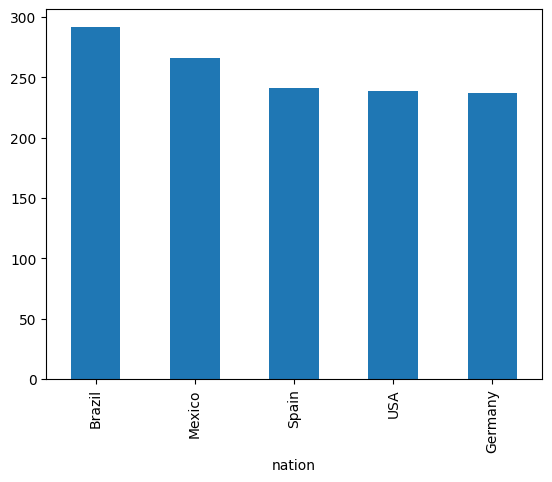

In [7]:
df.loc[cond1, 'nation'].value_counts()[:5].plot(kind='bar')

In [8]:
# 누적 득점 많은 나라 top5 그래프
df.groupby('nation')['score'].sum().sort_values(ascending=False)[:5]

nation
Brazil     954
Germany    875
Mexico     858
Spain      781
Japan      776
Name: score, dtype: int64

<Axes: xlabel='nation'>

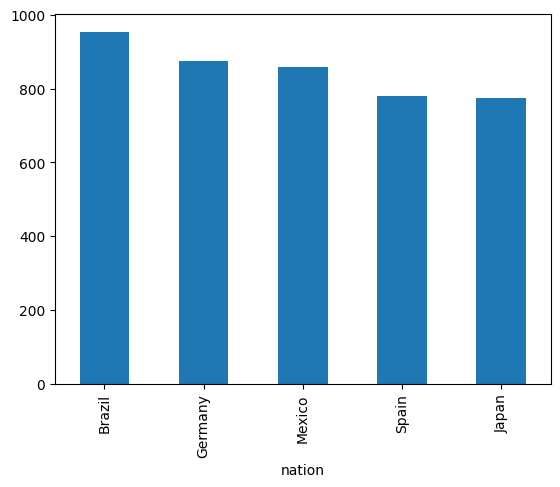

In [9]:
df.groupby('nation')['score'].sum().sort_values(ascending=False)[:5].plot(kind='bar')

In [10]:
# nlargest
df.groupby('nation')['score'].sum().nlargest(5)

nation
Brazil     954
Germany    875
Mexico     858
Spain      781
Japan      776
Name: score, dtype: int64

In [11]:
# nsmallest
df.groupby('nation')['score'].sum().nsmallest(5)

nation
Gibraltar                   19
Turks and Caicos Islands    20
American Samoa              22
Cook Islands                22
Somalia                     23
Name: score, dtype: int64

In [12]:
# 평균 득점이 높은 나라 top 5
# df.groupby('nation')['score'].mean().nlargest(5)
df.groupby('nation')['score'].mean().sort_values(ascending=False)[:5]

nation
Germany         2.24
Spain           2.21
Brazil          2.20
New Caledonia   2.20
Netherlands     2.06
Name: score, dtype: float64

In [13]:
# 총 게임수가 100경기 이상의 국가들만의 데이터
cond2 = df.groupby('nation')['date'].transform('count') >= 100
df[cond2].groupby('nation')['score'].mean().sort_values(ascending=False)[:5]

nation
Germany       2.24
Spain         2.21
Brazil        2.20
Netherlands   2.06
Australia     2.05
Name: score, dtype: float64

<Axes: xlabel='nation'>

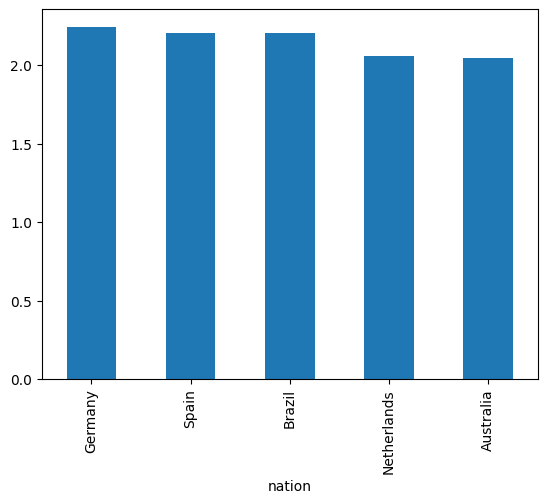

In [14]:
df[cond2].groupby('nation')['score'].mean().sort_values(ascending=False)[:5].plot(kind='bar')

In [15]:
# 전체 데이터에서 월드컵 관련 데이터만 필터링
df['tournament'].unique() #WC
cond3 = df['tournament'] == 'WC'

In [16]:
# 월드컵 다득점 상위 5개국
df[cond3].groupby('nation')['score'].sum().nlargest(5)

nation
Brazil       81
Germany      79
Spain        56
Argentina    55
France       49
Name: score, dtype: int64

<Axes: xlabel='nation'>

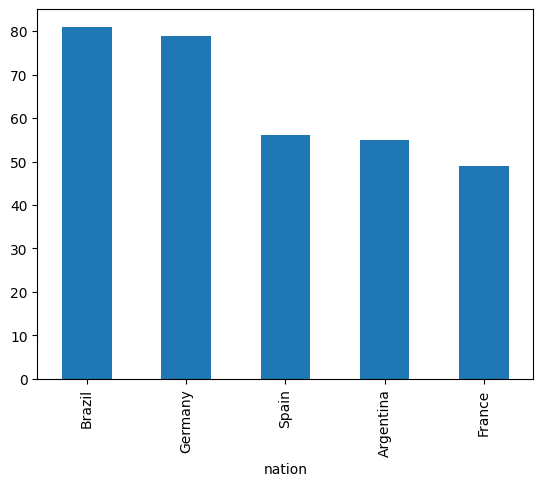

In [17]:
df[cond3].groupby('nation')['score'].sum().nlargest(5).plot(kind='bar')

### 한국축구 데이터를 groupby와 resample로 집계하기

In [18]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format # 소수점 두자리 까지만 출력
url = 'https://raw.githubusercontent.com/panda-kim/csv_files/main/soccer_match.csv'

# date 열을 datetime으로 적용해 데이터 프레임부르기
df = pd.read_csv(url, parse_dates=['date'])
df

,date,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
0,1993-08-08,Bolivia,South America,Home,Uruguay,South America,3,1,Others,Win
1,1993-08-08,Uruguay,South America,Away,Bolivia,South America,1,3,Others,Lose
2,1993-08-08,Mexico,North America,Home,Brazil,South America,1,1,Frendly,Draw
3,1993-08-08,Brazil,South America,Away,Mexico,North America,1,1,Frendly,Draw
4,1993-08-08,Ecuador,South America,Home,Venezuela,South America,5,0,Others,Win
...,...,...,...,...,...,...,...,...,...,...
47837,2022-06-14,Chile,South America,Away,Ghana,Africa,0,0,Others,Draw
47838,2022-06-14,Tunisia,Africa,Home,Japan,Asia,3,0,Others,Win
47839,2022-06-14,Japan,Asia,Away,Tunisia,Africa,0,3,Others,Lose
47840,2022-06-14,Korea,Asia,Home,Egypt,Africa,4,1,Frendly,Win


In [19]:
# 한국의 데이터만 필터링하고 DatetimeIndex로 만들기
cond4 = df['nation'] == 'Korea'
df_kr = df[cond4].set_index('date')
df_kr

,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
date,,,,,,,,,
1993-09-24,Korea,Asia,Away,Australia,Oceania,1,1,Frendly,Draw
1993-09-26,Korea,Asia,Away,Australia,Oceania,1,0,Frendly,Win
1993-10-16,Korea,Asia,Away,IR Iran,Asia,3,0,Others,Win
1993-10-19,Korea,Asia,Home,Iraq,Asia,2,2,Others,Draw
1993-10-22,Korea,Asia,Away,Saudi Arabia,Asia,1,1,Others,Draw
...,...,...,...,...,...,...,...,...,...
2022-03-29,Korea,Asia,Away,United Arab Emirates,Asia,0,1,Others,Lose
2022-06-02,Korea,Asia,Away,Brazil,South America,1,5,Frendly,Lose
2022-06-06,Korea,Asia,Home,Chile,South America,2,0,Frendly,Win


In [20]:
df_kr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 436 entries, 1993-09-24 to 2022-06-14
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nation       436 non-null    object
 1   continent    436 non-null    object
 2   H/A          436 non-null    object
 3   oppenent     436 non-null    object
 4   o_continent  436 non-null    object
 5   score        436 non-null    int64 
 6   o_score      436 non-null    int64 
 7   tournament   436 non-null    object
 8   result       436 non-null    object
dtypes: int64(2), object(7)
memory usage: 34.1+ KB


In [21]:
# 한국 데이터 중 2002년도의 데이터만 필터링
df_kr.loc['2002':]

,nation,continent,H/A,oppenent,o_continent,score,o_score,tournament,result
date,,,,,,,,,
2002-01-19,Korea,Asia,Home,USA,North America,1,2,Others,Lose
2002-01-23,Korea,Asia,Away,Cuba,North America,0,0,Others,Draw
2002-01-27,Korea,Asia,Home,Mexico,North America,0,0,Others,Draw
2002-01-30,Korea,Asia,Home,Costa Rica,North America,1,3,Others,Lose
2002-02-02,Korea,Asia,Home,Canada,North America,1,2,Others,Lose
...,...,...,...,...,...,...,...,...,...
2022-03-29,Korea,Asia,Away,United Arab Emirates,Asia,0,1,Others,Lose
2022-06-02,Korea,Asia,Away,Brazil,South America,1,5,Frendly,Lose
2022-06-06,Korea,Asia,Home,Chile,South America,2,0,Frendly,Win


In [22]:
# 승률을 구하기 위한 lambda 함수 만들기 위해 시리즈 생성
x = pd.Series(['Win', 'Lose', 'Win', 'Draw'])
(x == 'Win').mean()

np.float64(0.5)

In [23]:
x.eq('Win').mean()

np.float64(0.5)

In [24]:
# 상대 대륙별 한국팀의 승률
wp = lambda x:(x=='Win').mean()
df_kr.groupby('o_continent')['result'].agg(wp)

o_continent
Africa          0.44
Asia            0.58
Europe          0.37
North America   0.40
Oceania         0.53
South America   0.31
Name: result, dtype: float64

In [25]:
# 한국의 상대 대륙별 승률과 평균 득점을 동시에
(df_kr
    .groupby('o_continent').agg({'result':wp, 'score':'mean'})
    .set_axis(['wp', 'goal per game'], axis=1))

,wp,goal per game
o_continent,,
Africa,0.44,1.44
Asia,0.58,1.87
Europe,0.37,1.29
North America,0.40,1.34
Oceania,0.53,1.21
South America,0.31,1.00


In [26]:
# 시계열은 groupby 대신 resample
# 연도별 한국의 승률
df_kr.resample('YE')['result'].agg(wp)

date
1993-12-31   0.43
1994-12-31   0.29
1995-12-31   0.33
1996-12-31   0.47
1997-12-31   0.68
1998-12-31   0.37
1999-12-31   0.20
2000-12-31   0.60
2001-12-31   0.47
2002-12-31   0.26
2003-12-31   0.47
2004-12-31   0.59
2005-12-31   0.35
2006-12-31   0.40
2007-12-31   0.36
2008-12-31   0.53
2009-12-31   0.46
2010-12-31   0.53
2011-12-31   0.59
2012-12-31   0.56
2013-12-31   0.33
2014-12-31   0.33
2015-12-31   0.80
2016-12-31   0.70
2017-12-31   0.31
2018-12-31   0.37
2019-12-31   0.67
2020-12-31   0.50
2021-12-31   0.70
2022-12-31   0.70
Freq: YE-DEC, Name: result, dtype: float64

<Axes: xlabel='date'>

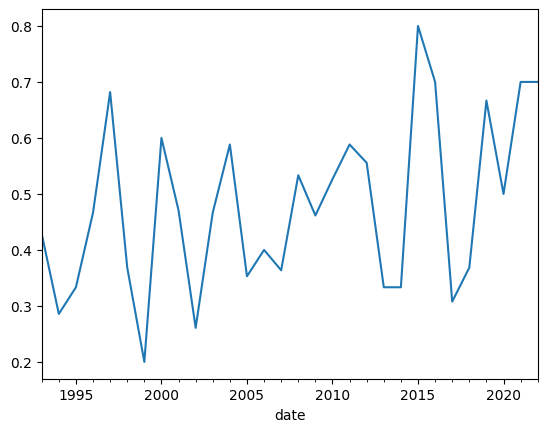

In [27]:
df_kr.resample('YE')['result'].agg(wp).plot()

In [28]:
# 2002년의 승률 확인
df_kr.loc['2002', 'result'].value_counts(normalize=True) # normalize는 비율

result
Draw   0.39
Lose   0.35
Win    0.26
Name: proportion, dtype: float64

In [29]:
# 연도별 한국의 평균 득점
df_kr.resample('YE')['score'].mean()

date
1993-12-31   1.57
1994-12-31   1.36
1995-12-31   1.22
1996-12-31   2.33
1997-12-31   2.14
1998-12-31   1.11
1999-12-31   0.80
2000-12-31   2.10
2001-12-31   1.29
2002-12-31   1.09
2003-12-31   2.33
2004-12-31   1.82
2005-12-31   1.24
2006-12-31   1.30
2007-12-31   0.82
2008-12-31   1.73
2009-12-31   1.23
2010-12-31   1.47
2011-12-31   2.06
2012-12-31   2.11
2013-12-31   1.07
2014-12-31   0.87
2015-12-31   2.20
2016-12-31   1.50
2017-12-31   1.23
2018-12-31   1.26
2019-12-31   1.50
2020-12-31   2.00
2021-12-31   2.00
2022-12-31   2.30
Freq: YE-DEC, Name: score, dtype: float64

<Axes: xlabel='date'>

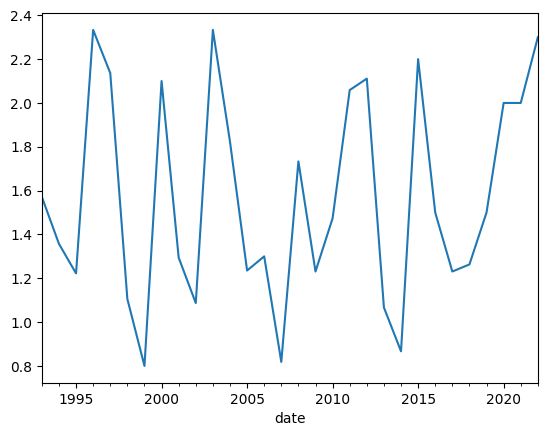

In [30]:
df_kr.resample('YE')['score'].mean().plot()